Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from bs4 import BeautifulSoup

from nltk.tokenize import word_tokenize

os.chdir('DATA')

In [2]:
infoFiles = [f for f in os.listdir() if f.endswith('.info')]
audioFiles = [f for f in os.listdir() if f.endswith('.wav')]
xmlFiles = [f for f in os.listdir() if f.endswith('.xml')]

Identifying min, max, average word count

Average word count 43.004561003420754
Min word count 11
Max word count 310


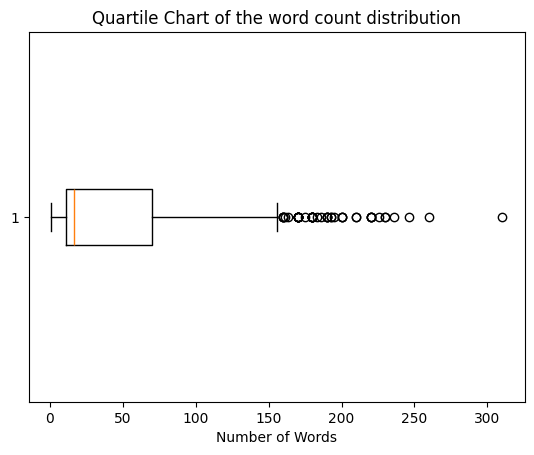

In [3]:
total = 0
numText = 0
wordCounts = []

min = -1
max = -1

for i in xmlFiles:
	with open (i, 'r', encoding='utf-8') as file:
		data = file.read()

		Bs_data = BeautifulSoup(data, "xml")
		b_unique = Bs_data.find_all('text')
		min = len(word_tokenize(b_unique[0].text))
		for j in b_unique:
			length = len(word_tokenize(j.text))
			total += length
			wordCounts.append(length)
			numText += 1

			if length < min:
				min = length
			elif length > max:
				max = length

print('Average word count', total/numText)
print('Min word count', min)
print('Max word count', max)

plt.boxplot(wordCounts, vert=False, notch=False)
plt.title('Quartile Chart of the word count distribution')
plt.xlabel('Number of Words')
plt.show()

identifying airport distribution

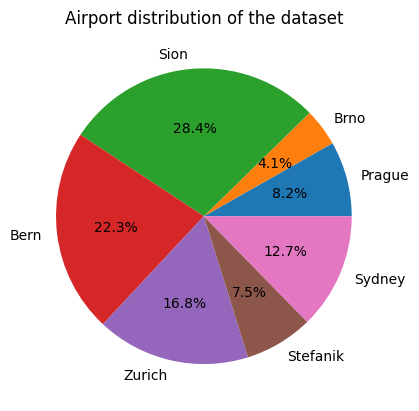

In [4]:
numFiles     = [0, 0, 0, 0, 0, 0, 0]
airportNames = ['Prague', 'Brno', 'Sion', 'Bern', 'Zurich', 'Stefanik', 'Sydney']
# Prague, Brno, Sion, Bern, Zurich, Stefanik (Bratislava, Slovakia), Sydney

for i in infoFiles:
	with open (i, 'r') as file:
		for line in file:
			if 'Praha Ruzyne' in line:
				numFiles[0] += 1
			elif 'Brno' in line:
				numFiles[1] += 1
			elif 'Sion' in line:
				numFiles[2] += 1
			elif 'Bern' in line:
				numFiles[3] += 1
			elif 'Zurich' in line:
				numFiles[4] += 1
			elif 'Bratislava' in line:
				numFiles[5] += 1
			elif 'Sydney' in line:
				numFiles[6] += 1

plt.pie(numFiles, labels=airportNames, autopct='%1.1f%%')
plt.title('Airport distribution of the dataset')
plt.show()